# Crypto Analysis COVID-19 amid turmoil and after plunge

Pandas-datareader is a tool to extract data from a wide range of Internet sources into a pandas DataFrame.

In [1]:
%matplotlib inline 
import json
import requests
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
from pandas.plotting import register_matplotlib_converters
from datetime import datetime, date, timedelta, timezone
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

/opt/conda/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Define variables
BTC_USD = "BTC-USD"
ETH_USD = "ETH-USD"
DJI_INDEX = "^DJI"
BND_INDEX = "BND.US"
VNQ_INDEX = "VNQ.US"
NKX_INDEX = "^NKX"
GOLD_INDEX = "GOLDAMGBD228NLBM"
start = datetime(2020, 1, 1)

In [3]:
# Retrieve financial asset data from data source
btc = pdr.DataReader(BTC_USD, "yahoo", "2020/1/1")
eth = pdr.DataReader(ETH_USD, "yahoo", "2020/1/1")
dji = pdr.DataReader(DJI_INDEX, "stooq", "2020/1/1")
bnd = pdr.DataReader(BND_INDEX, "stooq", "2020/1/1")
vnq = pdr.DataReader(VNQ_INDEX, "stooq", "2020/1/1")
nkx = pdr.DataReader(NKX_INDEX, "stooq", "2020/1/1")
gld = pdr.DataReader(GOLD_INDEX, "fred", start)
df = pd.concat([btc, eth['Close'], dji['Close'], bnd['Close'], vnq['Close'], nkx['Close'], gld], axis=1, join='inner')
df_ = df.iloc[:, [3, 6, 7, 8, 9, 10, -1]].dropna()
df_.columns = ['btc', 'eth', 'dji', 'bnd', 'vnq', 'nkx', 'gld']
df_.tail()

,btc,eth,dji,bnd,vnq,nkx,gld
2020-04-02,6733.387207,142.091309,21413.44,86.00,65.48,17818.72,1588.05
2020-04-03,6867.527344,145.219391,21052.53,85.96,64.53,17820.19,1609.75
2020-04-06,7176.414551,165.101944,22679.99,86.23,69.31,18576.30,1636.60
2020-04-07,7334.098633,172.641739,22653.86,86.31,69.95,18950.18,1652.20
2020-04-08,7302.089355,170.807144,23433.57,86.53,74.72,19353.24,1649.05


In [4]:
df_.describe()

,btc,eth,dji,bnd,vnq,nkx,gld
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,8165.896132,182.304661,26010.337377,84.982475,85.197820,21378.122787,1590.542623
std,1427.375223,47.179700,3458.821450,1.475947,12.572506,2506.120138,47.051430
min,4970.788086,110.605873,18591.930000,80.330000,56.910000,16552.830000,1472.350000
25%,6867.527344,142.029144,22653.860000,84.080000,71.580000,19084.970000,1561.850000
50%,8680.875977,170.807144,27090.860000,85.003000,91.546000,22605.410000,1583.450000
75%,9293.521484,224.479630,28992.410000,85.971000,94.473000,23575.720000,1624.450000
max,10326.054688,284.217499,29551.420000,87.960000,98.799000,24041.260000,1687.000000


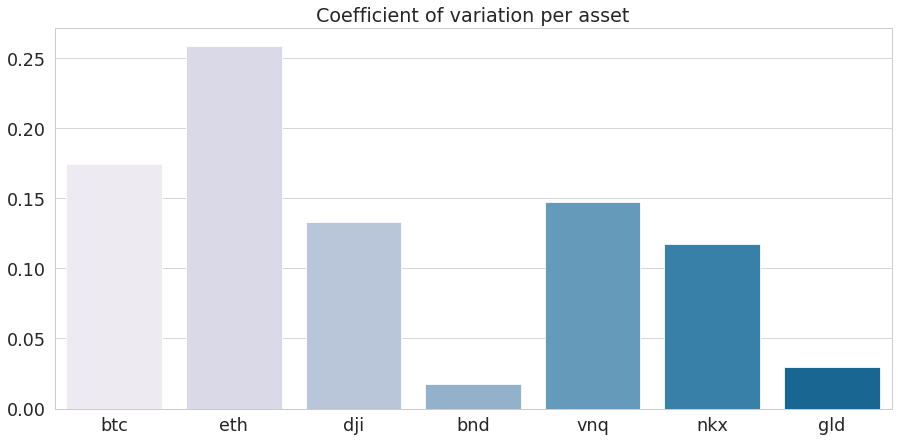

In [5]:
# seaborn drawing
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("PuBu", 8)
sns.set_context(context='paper', font_scale=2, rc=None)

# Coefficient of variation per asset
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 1, 1)
cv = pd.DataFrame(df_.std()/df_.mean())
cv.columns = ['Coef']
ax.set_title('Coefficient of variation per asset')
sns.barplot(data=cv.T)

In [6]:
# Rolling 7-days change of financial assets (%) 
df_['btc_pct'] = df_.loc[:, 'btc'].pct_change(1).fillna(df_['btc'].pct_change(1).median())
df_['btc_rol'] = df_.loc[:, 'btc_pct'].rolling(7).sum().fillna(df_['btc_pct'].rolling(7).sum().median())
df_['eth_pct'] = df_.loc[:, 'eth'].pct_change(1).fillna(df_['eth'].pct_change(1).median())
df_['eth_rol'] = df_.loc[:, 'eth_pct'].rolling(7).sum().fillna(df_['eth_pct'].rolling(7).sum().median())
df_['dji_pct'] = df_.loc[:, 'dji'].pct_change(1).fillna(df_['dji'].pct_change(1).median())
df_['dji_rol'] = df_.loc[:, 'dji_pct'].rolling(7).sum().fillna(df_['dji_pct'].rolling(7).sum().median())
df_['bnd_pct'] = df_.loc[:, 'bnd'].pct_change(1).fillna(df_['bnd'].pct_change(1).median())
df_['bnd_rol'] = df_.loc[:, 'bnd_pct'].rolling(7).sum().fillna(df_['bnd_pct'].rolling(7).sum().median())
df_['vnq_pct'] = df_.loc[:, 'vnq'].pct_change(1).fillna(df_['vnq'].pct_change(1).median())
df_['vnq_rol'] = df_.loc[:, 'vnq_pct'].rolling(7).sum().fillna(df_['vnq_pct'].rolling(7).sum().median())
df_['nkx_pct'] = df_.loc[:, 'nkx'].pct_change(1).fillna(df_['nkx'].pct_change(1).median())
df_['nkx_rol'] = df_.loc[:, 'nkx_pct'].rolling(7).sum().fillna(df_['nkx_pct'].rolling(7).sum().median())
df_['gld_pct'] = df_.loc[:, 'gld'].pct_change(1).fillna(df_['gld'].pct_change(1).median())
df_['gld_rol'] = df_.loc[:, 'gld_pct'].rolling(7).sum().fillna(df_['gld_pct'].rolling(7).sum().median())
df_.head()

,btc,eth,dji,bnd,vnq,nkx,gld,btc_pct,btc_rol,eth_pct,...,dji_pct,dji_rol,bnd_pct,bnd_rol,vnq_pct,vnq_rol,nkx_pct,nkx_rol,gld_pct,gld_rol
2020-01-06,7769.219238,144.304153,28703.38,83.825,91.665,23204.86,1576.85,-0.000771,0.040501,0.001206,...,-0.000877,-0.00581,0.001065,0.007411,0.002995,0.003083,-0.002669,-0.020537,0.000571,0.010469
2020-01-07,8163.692383,143.543991,28583.68,83.757,90.643,23575.72,1566.50,0.050774,0.040501,-0.005268,...,-0.004170,-0.00581,-0.000811,0.007411,-0.011149,0.003083,0.015982,-0.020537,-0.006564,0.010469
2020-01-08,8079.862793,141.258133,28745.09,83.627,90.921,23204.76,1582.85,-0.010269,0.040501,-0.015924,...,0.005647,-0.00581,-0.001552,0.007411,0.003067,0.003083,-0.015735,-0.020537,0.010437,0.010469
2020-01-09,7879.071289,138.979202,28956.90,83.727,90.871,23739.87,1547.85,-0.024851,0.040501,-0.016133,...,0.007369,-0.00581,0.001196,0.007411,-0.000550,0.003083,0.023060,-0.020537,-0.022112,0.010469
2020-01-10,8166.554199,143.963776,28823.77,83.865,91.566,23850.57,1548.80,0.036487,0.040501,0.035866,...,-0.004598,-0.00581,0.001648,0.007411,0.007648,0.003083,0.004663,-0.020537,0.000614,0.010469


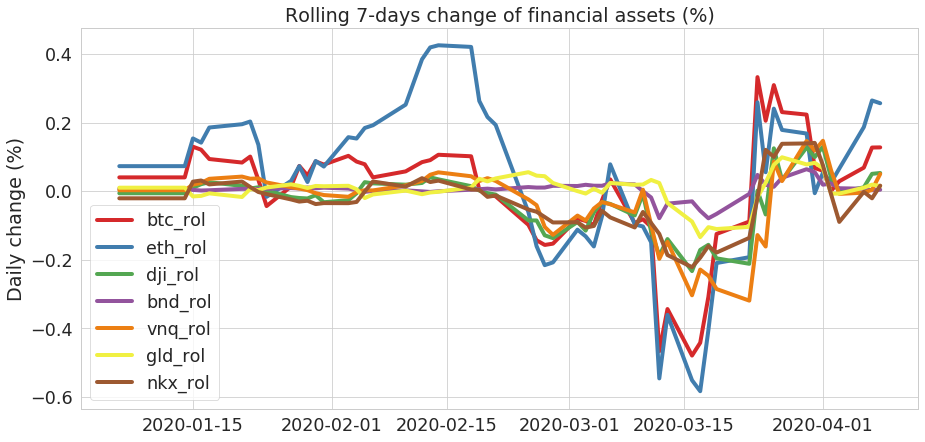

In [7]:
# Seaborn setting
sns.set_style('whitegrid')
sns.set_palette("Set1", 24, .85)
sns.set_context(context='paper', font_scale=2, rc={"lines.linewidth": 4})

# Rolling 7-days change of financial assets (%) 
df_rolling = df_.iloc[:, [8, 10, 12, 14, 16, 20, 18]]

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Rolling 7-days change of financial assets (%)')
ax.set_ylabel('Daily change (%)')
sns.lineplot(data=df_rolling, ci='sd', dashes=False)

In [8]:
# Rolling 7-days standard deviation of financial assets (%) 
df_['btc_std'] = df_.loc[:, 'btc_pct'].rolling(7).std().fillna(df_['btc_pct'].rolling(7).std().median())
df_['eth_std'] = df_.loc[:, 'eth_pct'].rolling(7).std().fillna(df_['eth_pct'].rolling(7).std().median())
df_['dji_std'] = df_.loc[:, 'dji_pct'].rolling(7).std().fillna(df_['dji_pct'].rolling(7).std().median())
df_['bnd_std'] = df_.loc[:, 'bnd_pct'].rolling(7).std().fillna(df_['bnd_pct'].rolling(7).std().median())
df_['vnq_std'] = df_.loc[:, 'vnq_pct'].rolling(7).std().fillna(df_['vnq_pct'].rolling(7).std().median())
df_['nkx_std'] = df_.loc[:, 'nkx_pct'].rolling(7).std().fillna(df_['nkx_pct'].rolling(7).std().median())
df_['gld_std'] = df_.loc[:, 'gld_pct'].rolling(7).std().fillna(df_['gld_pct'].rolling(7).std().median())
df_.head()

,btc,eth,dji,bnd,vnq,nkx,gld,btc_pct,btc_rol,eth_pct,...,nkx_rol,gld_pct,gld_rol,btc_std,eth_std,dji_std,bnd_std,vnq_std,nkx_std,gld_std
2020-01-06,7769.219238,144.304153,28703.38,83.825,91.665,23204.86,1576.85,-0.000771,0.040501,0.001206,...,-0.020537,0.000571,0.010469,0.029989,0.058382,0.026096,0.002706,0.023677,0.016482,0.010294
2020-01-07,8163.692383,143.543991,28583.68,83.757,90.643,23575.72,1566.50,0.050774,0.040501,-0.005268,...,-0.020537,-0.006564,0.010469,0.029989,0.058382,0.026096,0.002706,0.023677,0.016482,0.010294
2020-01-08,8079.862793,141.258133,28745.09,83.627,90.921,23204.76,1582.85,-0.010269,0.040501,-0.015924,...,-0.020537,0.010437,0.010469,0.029989,0.058382,0.026096,0.002706,0.023677,0.016482,0.010294
2020-01-09,7879.071289,138.979202,28956.90,83.727,90.871,23739.87,1547.85,-0.024851,0.040501,-0.016133,...,-0.020537,-0.022112,0.010469,0.029989,0.058382,0.026096,0.002706,0.023677,0.016482,0.010294
2020-01-10,8166.554199,143.963776,28823.77,83.865,91.566,23850.57,1548.80,0.036487,0.040501,0.035866,...,-0.020537,0.000614,0.010469,0.029989,0.058382,0.026096,0.002706,0.023677,0.016482,0.010294


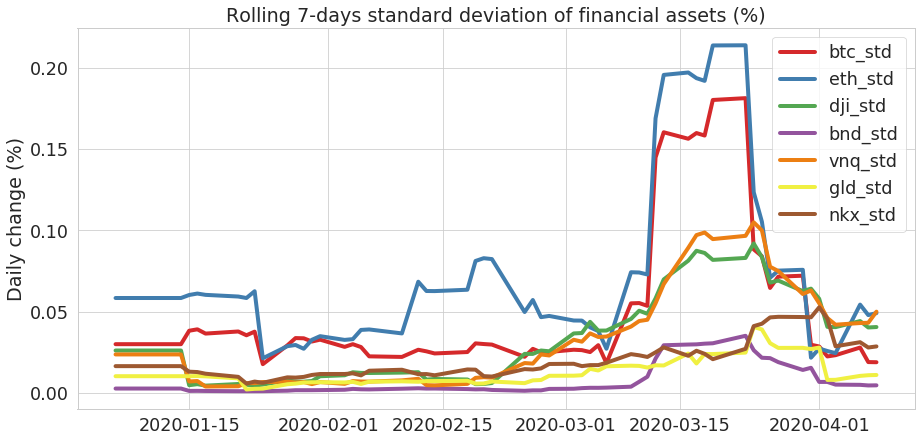

In [9]:
# Seaborn setting
sns.set_style('whitegrid')
sns.set_palette("Set1", 24, .85)
sns.set_context(context='paper', font_scale=2, rc={"lines.linewidth": 4})

# Rolling 7-days standard deviation of financial assets (%) 
df_std = df_.iloc[:, [21, 22, 23, 24, 25, 27, 26]]

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Rolling 7-days standard deviation of financial assets (%)')
ax.set_ylabel('Daily change (%)')
sns.lineplot(data=df_std, ci='sd', dashes=False)

In [10]:
# Bitcoin's rolling 7-days correlation with other financial assets
df_['btc_eth_corr'] = df_.loc[:, 'btc'].rolling(7).corr(df_.loc[:, 'eth']).fillna(df_.loc[:, 'btc'].rolling(7).corr(df_.loc[:, 'eth']).median())
df_['btc_dji_corr'] = df_.loc[:, 'btc'].rolling(7).corr(df_.loc[:, 'dji']).fillna(df_.loc[:, 'btc'].rolling(7).corr(df_.loc[:, 'dji']).median())
df_['btc_bnd_corr'] = df_.loc[:, 'btc'].rolling(7).corr(df_.loc[:, 'bnd']).fillna(df_.loc[:, 'btc'].rolling(7).corr(df_.loc[:, 'bnd']).median())
df_['btc_vnq_corr'] = df_.loc[:, 'btc'].rolling(7).corr(df_.loc[:, 'vnq']).fillna(df_.loc[:, 'btc'].rolling(7).corr(df_.loc[:, 'vnq']).median())
df_['btc_nkx_corr'] = df_.loc[:, 'btc'].rolling(7).corr(df_.loc[:, 'nkx']).fillna(df_.loc[:, 'btc'].rolling(7).corr(df_.loc[:, 'nkx']).median())
df_['btc_gld_corr'] = df_.loc[:, 'btc'].rolling(7).corr(df_.loc[:, 'gld']).fillna(df_.loc[:, 'btc'].rolling(7).corr(df_.loc[:, 'gld']).median())
df_.head()

,btc,eth,dji,bnd,vnq,nkx,gld,btc_pct,btc_rol,eth_pct,...,bnd_std,vnq_std,nkx_std,gld_std,btc_eth_corr,btc_dji_corr,btc_bnd_corr,btc_vnq_corr,btc_nkx_corr,btc_gld_corr
2020-01-06,7769.219238,144.304153,28703.38,83.825,91.665,23204.86,1576.85,-0.000771,0.040501,0.001206,...,0.002706,0.023677,0.016482,0.010294,0.962011,0.582402,0.208969,0.523037,0.627355,0.221922
2020-01-07,8163.692383,143.543991,28583.68,83.757,90.643,23575.72,1566.50,0.050774,0.040501,-0.005268,...,0.002706,0.023677,0.016482,0.010294,0.962011,0.582402,0.208969,0.523037,0.627355,0.221922
2020-01-08,8079.862793,141.258133,28745.09,83.627,90.921,23204.76,1582.85,-0.010269,0.040501,-0.015924,...,0.002706,0.023677,0.016482,0.010294,0.962011,0.582402,0.208969,0.523037,0.627355,0.221922
2020-01-09,7879.071289,138.979202,28956.90,83.727,90.871,23739.87,1547.85,-0.024851,0.040501,-0.016133,...,0.002706,0.023677,0.016482,0.010294,0.962011,0.582402,0.208969,0.523037,0.627355,0.221922
2020-01-10,8166.554199,143.963776,28823.77,83.865,91.566,23850.57,1548.80,0.036487,0.040501,0.035866,...,0.002706,0.023677,0.016482,0.010294,0.962011,0.582402,0.208969,0.523037,0.627355,0.221922


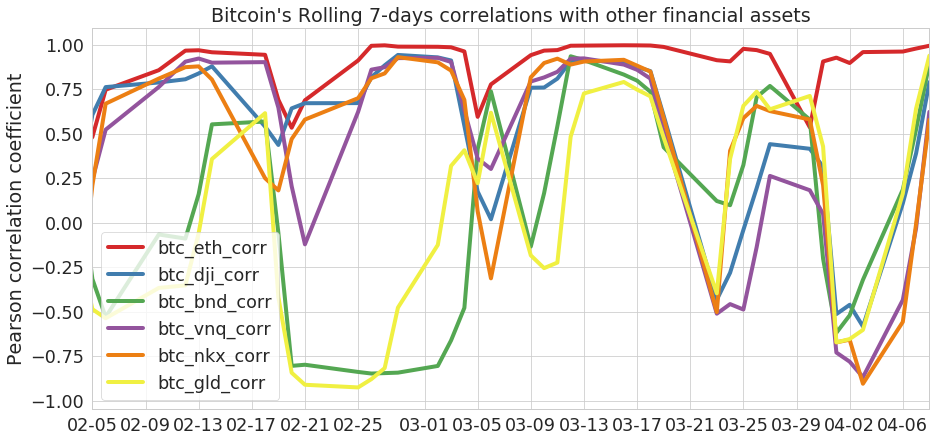

In [11]:
# Import libraries
import matplotlib.ticker as ticker
from matplotlib.dates import date2num
xticks = date2num([
    datetime(2020, 2, 5, 0, 0),
    datetime(2020, 2, 9, 0, 0),
    datetime(2020, 2, 13, 0, 0),
    datetime(2020, 2, 17, 0, 0),
    datetime(2020, 2, 21, 0, 0),
    datetime(2020, 2, 25, 0, 0),
    datetime(2020, 3, 1, 0, 0),
    datetime(2020, 3, 5, 0, 0),
    datetime(2020, 3, 9, 0, 0),
    datetime(2020, 3, 13, 0, 0),
    datetime(2020, 3, 17, 0, 0),
    datetime(2020, 3, 21, 0, 0),
    datetime(2020, 3, 25, 0, 0),
    datetime(2020, 3, 29, 0, 0),
    datetime(2020, 4, 2, 0, 0),
    datetime(2020, 4, 6, 0, 0)
])

# Seaborn setting
sns.set_style('whitegrid')
sns.set_palette("Set1", 24, .85)
sns.set_context(context='paper', font_scale=2, rc={"lines.linewidth": 4})

# Bitcoin's rolling 7-days correlation with other financial assets
df_corr = df_.iloc[:, [28, 29, 30, 31, 32, 33]]

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Bitcoin\'s Rolling 7-days correlations with other financial assets')
ax.set_ylabel('Pearson correlation coefficient')
ax.set_xlim(date2num([df_corr.index[20], df_corr.index[-1]]))
ax.xaxis.set_major_locator(ticker.FixedLocator(xticks))
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
sns.lineplot(data=df_corr, ci='sd', dashes=False)

In [12]:
# Rolling 21-days volatilities of financial assets
# np.log function to compute the logarithmic returns of daily basis, generate new columns
df_['btc_log'] = df_.loc[:, 'btc'].rolling(2).apply(lambda x: np.log(x[1]/x[0])).fillna(df_.loc[:, 'btc'].rolling(2).apply(lambda x: np.log(x[1]/x[0])).median())
df_['eth_log'] = df_.loc[:, 'eth'].rolling(2).apply(lambda x: np.log(x[1]/x[0])).fillna(df_.loc[:, 'eth'].rolling(2).apply(lambda x: np.log(x[1]/x[0])).median())
df_['dji_log'] = df_.loc[:, 'dji'].rolling(2).apply(lambda x: np.log(x[1]/x[0])).fillna(df_.loc[:, 'dji'].rolling(2).apply(lambda x: np.log(x[1]/x[0])).median())
df_['bnd_log'] = df_.loc[:, 'bnd'].rolling(2).apply(lambda x: np.log(x[1]/x[0])).fillna(df_.loc[:, 'bnd'].rolling(2).apply(lambda x: np.log(x[1]/x[0])).median())
df_['vnq_log'] = df_.loc[:, 'vnq'].rolling(2).apply(lambda x: np.log(x[1]/x[0])).fillna(df_.loc[:, 'vnq'].rolling(2).apply(lambda x: np.log(x[1]/x[0])).median())
df_['nkx_log'] = df_.loc[:, 'nkx'].rolling(2).apply(lambda x: np.log(x[1]/x[0])).fillna(df_.loc[:, 'nkx'].rolling(2).apply(lambda x: np.log(x[1]/x[0])).median())
df_['gld_log'] = df_.loc[:, 'gld'].rolling(2).apply(lambda x: np.log(x[1]/x[0])).fillna(df_.loc[:, 'gld'].rolling(2).apply(lambda x: np.log(x[1]/x[0])).median())
# compute rolling 21-days standard deviation for the logarithmic returns per day, next times rolling days np.sqrt(252)
df_['btc_vol'] = df_.loc[:, 'btc_log'].rolling(21).std().fillna(df_.loc[:, 'btc_log'].rolling(21).std().median())*np.sqrt(252)
df_['eth_vol'] = df_.loc[:, 'eth_log'].rolling(21).std().fillna(df_.loc[:, 'eth_log'].rolling(21).std().median())*np.sqrt(252)
df_['dji_vol'] = df_.loc[:, 'dji_log'].rolling(21).std().fillna(df_.loc[:, 'dji_log'].rolling(21).std().median())*np.sqrt(252)
df_['bnd_vol'] = df_.loc[:, 'bnd_log'].rolling(21).std().fillna(df_.loc[:, 'bnd_log'].rolling(21).std().median())*np.sqrt(252)
df_['vnq_vol'] = df_.loc[:, 'vnq_log'].rolling(21).std().fillna(df_.loc[:, 'vnq_log'].rolling(21).std().median())*np.sqrt(252)
df_['nkx_vol'] = df_.loc[:, 'nkx_log'].rolling(21).std().fillna(df_.loc[:, 'nkx_log'].rolling(21).std().median())*np.sqrt(252)
df_['gld_vol'] = df_.loc[:, 'gld_log'].rolling(21).std().fillna(df_.loc[:, 'gld_log'].rolling(21).std().median())*np.sqrt(252)
df_.head()

,btc,eth,dji,bnd,vnq,nkx,gld,btc_pct,btc_rol,eth_pct,...,vnq_log,nkx_log,gld_log,btc_vol,eth_vol,dji_vol,bnd_vol,vnq_vol,nkx_vol,gld_vol
2020-01-06,7769.219238,144.304153,28703.38,83.825,91.665,23204.86,1576.85,-0.000771,0.040501,0.001206,...,0.002991,-0.002674,0.000571,0.648002,1.145283,0.52759,0.06875,0.474556,0.300234,0.177455
2020-01-07,8163.692383,143.543991,28583.68,83.757,90.643,23575.72,1566.50,0.050774,0.040501,-0.005268,...,-0.011212,0.015856,-0.006585,0.648002,1.145283,0.52759,0.06875,0.474556,0.300234,0.177455
2020-01-08,8079.862793,141.258133,28745.09,83.627,90.921,23204.76,1582.85,-0.010269,0.040501,-0.015924,...,0.003062,-0.015860,0.010383,0.648002,1.145283,0.52759,0.06875,0.474556,0.300234,0.177455
2020-01-09,7879.071289,138.979202,28956.90,83.727,90.871,23739.87,1547.85,-0.024851,0.040501,-0.016133,...,-0.000550,0.022798,-0.022360,0.648002,1.145283,0.52759,0.06875,0.474556,0.300234,0.177455
2020-01-10,8166.554199,143.963776,28823.77,83.865,91.566,23850.57,1548.80,0.036487,0.040501,0.035866,...,0.007619,0.004652,0.000614,0.648002,1.145283,0.52759,0.06875,0.474556,0.300234,0.177455


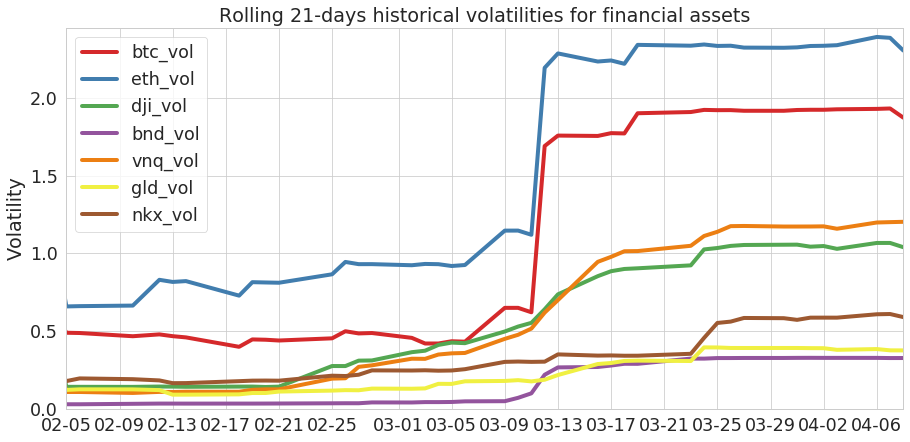

In [13]:
# Seaborn setting
sns.set_style('whitegrid')
sns.set_palette("Set1", 24, .85)
sns.set_context(context='paper', font_scale=2, rc={"lines.linewidth": 4})

# Rolling 21-days volatilities of financial assets
df_vol = df_.iloc[:, [41, 42, 43, 44, 45, 47, 46]]

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Rolling 21-days historical volatilities for financial assets')
ax.set_ylabel('Volatility')
ax.set_ylim(0.00, 2.45)
ax.set_xlim(date2num([df_corr.index[20], df_corr.index[-1]]))
ax.xaxis.set_major_locator(ticker.FixedLocator(xticks))
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.5, 1), loc='upper left', borderaxespad=0, fontsize=18)
sns.lineplot(data=df_vol, ci='sd', dashes=False)

In [14]:
# Rolling 21-days sharpe ratio for financial assets
# compute daily change then from daily change calculate rolling 21-days returns mean, divide by the rollgin 21-days volatilities
df_['btc_sha'] = df_.loc[:, 'btc'].pct_change().rolling(21).mean().fillna(df_.loc[:, 'btc'].pct_change().rolling(21).mean().median())/df_.loc[:, 'btc_vol']
df_['eth_sha'] = df_.loc[:, 'eth'].pct_change().rolling(21).mean().fillna(df_.loc[:, 'eth'].pct_change().rolling(21).mean().median())/df_.loc[:, 'eth_vol']
df_['dji_sha'] = df_.loc[:, 'dji'].pct_change().rolling(21).mean().fillna(df_.loc[:, 'dji'].pct_change().rolling(21).mean().median())/df_.loc[:, 'dji_vol']
df_['bnd_sha'] = df_.loc[:, 'bnd'].pct_change().rolling(21).mean().fillna(df_.loc[:, 'bnd'].pct_change().rolling(21).mean().median())/df_.loc[:, 'bnd_vol']
df_['vnq_sha'] = df_.loc[:, 'vnq'].pct_change().rolling(21).mean().fillna(df_.loc[:, 'vnq'].pct_change().rolling(21).mean().median())/df_.loc[:, 'vnq_vol']
df_['gld_sha'] = df_.loc[:, 'gld'].pct_change().rolling(21).mean().fillna(df_.loc[:, 'gld'].pct_change().rolling(21).mean().median())/df_.loc[:, 'gld_vol']
df_['nkx_sha'] = df_.loc[:, 'nkx'].pct_change().rolling(21).mean().fillna(df_.loc[:, 'nkx'].pct_change().rolling(21).mean().median())/df_.loc[:, 'nkx_vol']
df_.head()

,btc,eth,dji,bnd,vnq,nkx,gld,btc_pct,btc_rol,eth_pct,...,vnq_vol,nkx_vol,gld_vol,btc_sha,eth_sha,dji_sha,bnd_sha,vnq_sha,gld_sha,nkx_sha
2020-01-06,7769.219238,144.304153,28703.38,83.825,91.665,23204.86,1576.85,-0.000771,0.040501,0.001206,...,0.474556,0.300234,0.177455,-0.006765,0.002733,-0.009146,0.005921,-0.00985,0.00217,-0.017909
2020-01-07,8163.692383,143.543991,28583.68,83.757,90.643,23575.72,1566.50,0.050774,0.040501,-0.005268,...,0.474556,0.300234,0.177455,-0.006765,0.002733,-0.009146,0.005921,-0.00985,0.00217,-0.017909
2020-01-08,8079.862793,141.258133,28745.09,83.627,90.921,23204.76,1582.85,-0.010269,0.040501,-0.015924,...,0.474556,0.300234,0.177455,-0.006765,0.002733,-0.009146,0.005921,-0.00985,0.00217,-0.017909
2020-01-09,7879.071289,138.979202,28956.90,83.727,90.871,23739.87,1547.85,-0.024851,0.040501,-0.016133,...,0.474556,0.300234,0.177455,-0.006765,0.002733,-0.009146,0.005921,-0.00985,0.00217,-0.017909
2020-01-10,8166.554199,143.963776,28823.77,83.865,91.566,23850.57,1548.80,0.036487,0.040501,0.035866,...,0.474556,0.300234,0.177455,-0.006765,0.002733,-0.009146,0.005921,-0.00985,0.00217,-0.017909


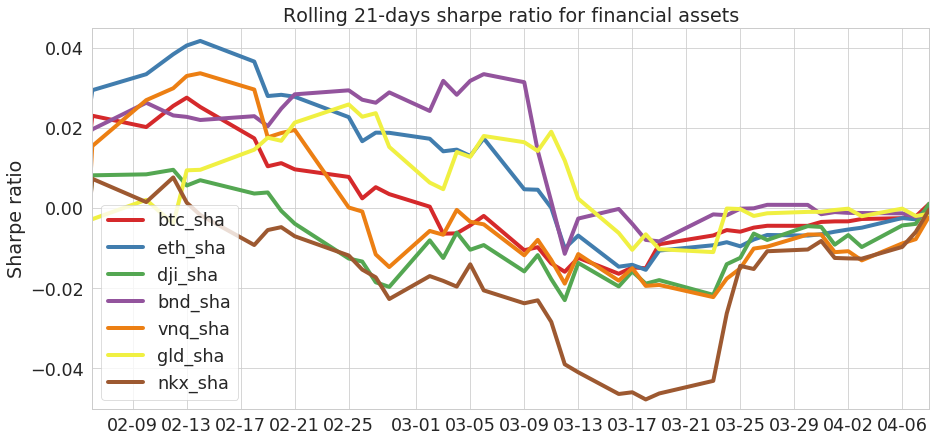

In [15]:
# Seaborn setting
sns.set_style('whitegrid')
sns.set_palette("Set1", 24, .85)
sns.set_context(context='paper', font_scale=2, rc={"lines.linewidth": 4})

# Rolling 21-days sharpe ratio for financial assets
df_sha = df_.iloc[:, [48, 49, 50, 51, 52, 53, 54]]

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Rolling 21-days sharpe ratio for financial assets')
ax.set_ylabel('Sharpe ratio')
ax.set_ylim(-0.05, 0.045)
ax.set_xlim(date2num([df_corr.index[21], df_corr.index[-1]]))
ax.xaxis.set_major_locator(ticker.FixedLocator(xticks))
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.5, 1), loc='upper left', borderaxespad=0, fontsize=18)
sns.lineplot(data=df_sha, ci='sd', dashes=False)

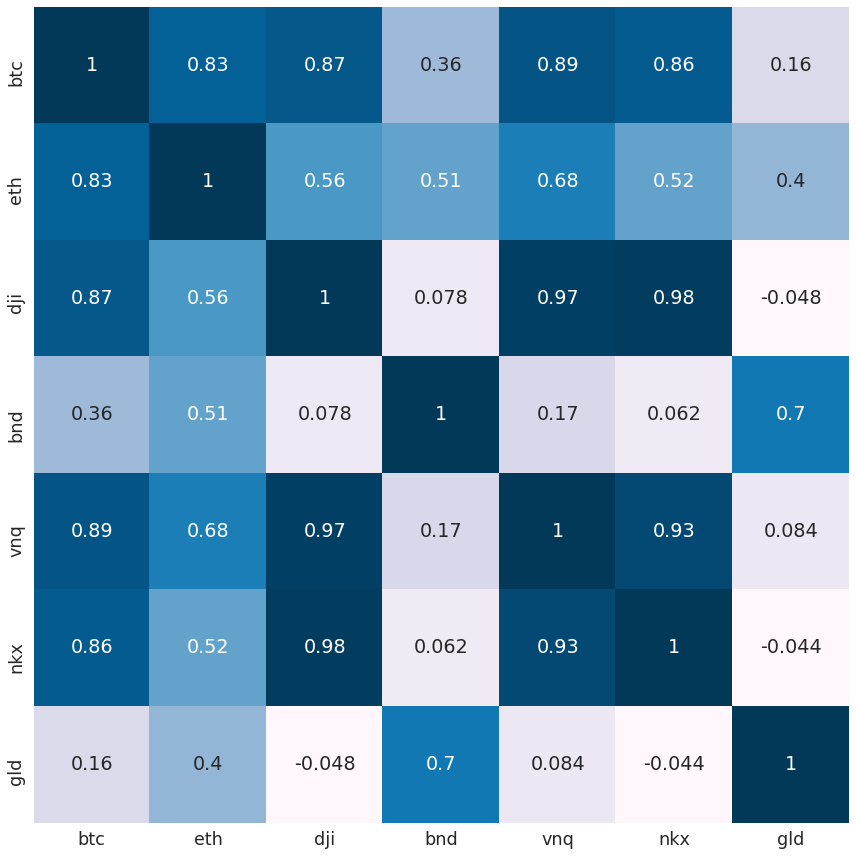

In [16]:
# Seaborn setting
sns.set_style('whitegrid')
sns.set_palette("PuBu", 8)
sns.set_context(context='paper', font_scale=2, rc={"lines.linewidth": 4})

# Correlation of the financial assets
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1)
orig = pd.concat([btc, eth['Close'], dji['Close'], bnd['Close'], vnq['Close'], nkx['Close'], gld], axis=1, join='inner')
df_orig = orig.iloc[:, [3, 6, 7, 8, 9, 10, -1]].dropna()
df_orig.columns = ['btc', 'eth', 'dji', 'bnd', 'vnq', 'nkx', 'gld']
df_orig_corr = df_orig.corr()
sns.heatmap(df_orig_corr, vmax=1.0, square=True, linecolor='white', annot=True, ax=ax, cbar=False, cmap='PuBu')

In [17]:
# Gold's rolling 7-days correlation with other financial assets
df_['gld_btc_corr'] = df_.loc[:, 'gld'].rolling(7).corr(df_.loc[:, 'btc']).fillna(df_.loc[:, 'gld'].rolling(7).corr(df_.loc[:, 'btc']).median())
df_['gld_eth_corr'] = df_.loc[:, 'gld'].rolling(7).corr(df_.loc[:, 'eth']).fillna(df_.loc[:, 'gld'].rolling(7).corr(df_.loc[:, 'eth']).median())
df_['gld_dji_corr'] = df_.loc[:, 'gld'].rolling(7).corr(df_.loc[:, 'dji']).fillna(df_.loc[:, 'gld'].rolling(7).corr(df_.loc[:, 'dji']).median())
df_['gld_bnd_corr'] = df_.loc[:, 'gld'].rolling(7).corr(df_.loc[:, 'bnd']).fillna(df_.loc[:, 'gld'].rolling(7).corr(df_.loc[:, 'bnd']).median())
df_['gld_vnq_corr'] = df_.loc[:, 'gld'].rolling(7).corr(df_.loc[:, 'vnq']).fillna(df_.loc[:, 'gld'].rolling(7).corr(df_.loc[:, 'vnq']).median())
df_['gld_nkx_corr'] = df_.loc[:, 'gld'].rolling(7).corr(df_.loc[:, 'nkx']).fillna(df_.loc[:, 'gld'].rolling(7).corr(df_.loc[:, 'nkx']).median())
df_.head()

,btc,eth,dji,bnd,vnq,nkx,gld,btc_pct,btc_rol,eth_pct,...,bnd_sha,vnq_sha,gld_sha,nkx_sha,gld_btc_corr,gld_eth_corr,gld_dji_corr,gld_bnd_corr,gld_vnq_corr,gld_nkx_corr
2020-01-06,7769.219238,144.304153,28703.38,83.825,91.665,23204.86,1576.85,-0.000771,0.040501,0.001206,...,0.005921,-0.00985,0.00217,-0.017909,0.221922,0.297003,-0.178861,0.611681,0.30709,-0.074936
2020-01-07,8163.692383,143.543991,28583.68,83.757,90.643,23575.72,1566.50,0.050774,0.040501,-0.005268,...,0.005921,-0.00985,0.00217,-0.017909,0.221922,0.297003,-0.178861,0.611681,0.30709,-0.074936
2020-01-08,8079.862793,141.258133,28745.09,83.627,90.921,23204.76,1582.85,-0.010269,0.040501,-0.015924,...,0.005921,-0.00985,0.00217,-0.017909,0.221922,0.297003,-0.178861,0.611681,0.30709,-0.074936
2020-01-09,7879.071289,138.979202,28956.90,83.727,90.871,23739.87,1547.85,-0.024851,0.040501,-0.016133,...,0.005921,-0.00985,0.00217,-0.017909,0.221922,0.297003,-0.178861,0.611681,0.30709,-0.074936
2020-01-10,8166.554199,143.963776,28823.77,83.865,91.566,23850.57,1548.80,0.036487,0.040501,0.035866,...,0.005921,-0.00985,0.00217,-0.017909,0.221922,0.297003,-0.178861,0.611681,0.30709,-0.074936


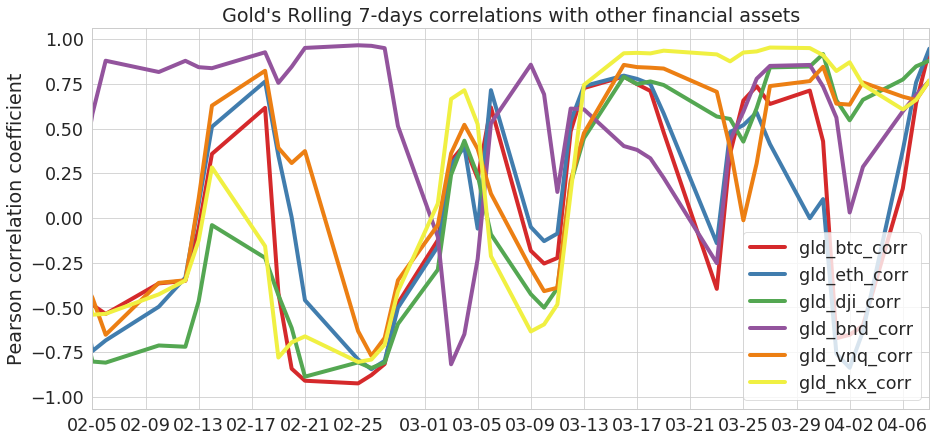

In [18]:
# Seaborn setting
sns.set_style('whitegrid')
sns.set_palette("Set1", 24, .85)
sns.set_context(context='paper', font_scale=2, rc={"lines.linewidth": 4})

# Gold's rolling 7-days correlation with other financial assets
df_corr = df_.iloc[:, [55, 56, 57, 58, 59, 60]]

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Gold\'s Rolling 7-days correlations with other financial assets')
ax.set_ylabel('Pearson correlation coefficient')
ax.set_xlim(date2num([df_corr.index[20], df_corr.index[-1]]))
ax.xaxis.set_major_locator(ticker.FixedLocator(xticks))
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
sns.lineplot(data=df_corr, ci='sd', dashes=False)